# Import Data Set

In [1]:
import pandas as pd
data = pd.read_csv("NewspaperData (1).csv")

In [2]:
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# Correlation

In [4]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


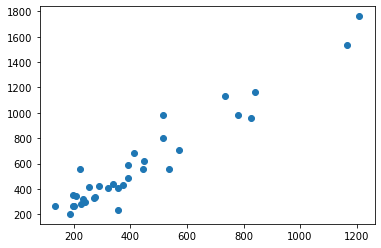

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data['daily'], data['sunday'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

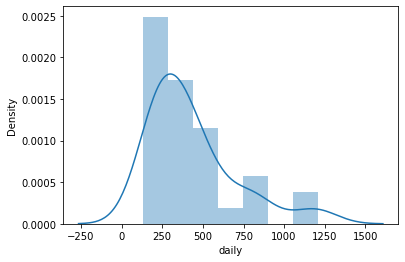

In [6]:
import seaborn as sns
sns.distplot(data['daily'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

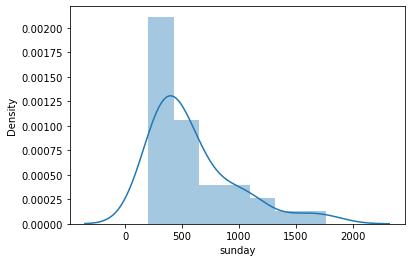

In [7]:
sns.distplot(data['sunday'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

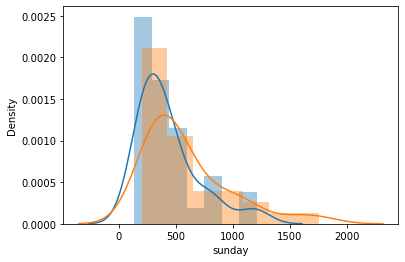

In [8]:
sns.distplot(data['daily'])
sns.distplot(data['sunday'])

### Fitting a Linear Regression Model

<AxesSubplot:xlabel='daily', ylabel='sunday'>

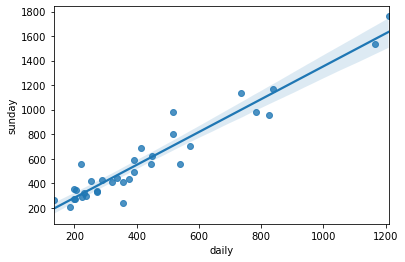

In [9]:
sns.regplot(x="daily", y="sunday", data=data)

In [10]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily", data = data).fit()

In [15]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           6.02e-19
Time:                        10:03:03   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#t and p-Values
model.tvalues

Intercept     0.386427
daily        18.934840
dtype: float64

In [16]:
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

In [17]:
#R squared values
model.rsquared

0.9180596895873295

In [18]:
model.rsquared_adj

0.9154990548869336

# Predict for new data point

In [20]:
#Predict for 200 and 300 daily circulation
newdata = pd.Series([200,300])
newdata

0    200
1    300
dtype: int64

In [21]:
data_pred = pd.DataFrame(newdata, columns=['daily'])
data_pred

,daily
0,200
1,300


In [22]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

In [28]:
#Y = 13.835630 + 1.339715 * X

In [29]:
13.835630 + 1.339715 * 200, 13.835630 + 1.339715 * 300

(281.77862999999996, 415.75012999999996)